### DATU SAGATAVOŠANA

In [ ]:
# BrambleXu. aspect term extraction. Tiešsaiste. GitHub: 11.09.2018. Pieejams: https://github.com/BrambleXu/aspect-term-extraction/tree/master. [skatīts 2025-03-23].

# OpenAI. ChatGPT o3-mini-high. Uzvedne: es tev iedošu kodu, kas tiek izmantots aspektu izgūšanai, un tas ir jāpārveido tā, lai kods derētu noskaņojuma prognozēšanai
# noteiktiem aspektiem teikumā. modelim nepieciešams prast tikai noteikt noskaņojumu jau dotajam aspektam, nevis noteikt gan aspektu, gan noskaņojumu. arī sākumā datu
# priekšapstrādei jānotiek tā, lai priekšapstrādātie dati tiktu saglabāti CSV failā, kas vēlāk tiek izmantots modeļa apmācīšanai kā tas ir redzams zemāk dotajā
# kodā https://chatgpt.com/ [izmantots 2025-03-27]
def soup2dict_sentiment(sentence_nodes):
    """
    Input: soup objects
    Output: a list of dictionaries, contains 'id', 'text', 'aspect', 'sentiment'
    """
    sentences = []
    i = 0
    for n in sentence_nodes:
        i += 1
        sentence = {}
        aspect_term = []
        polarity_list = []
        sentence['id'] = i
        sentence['text'] = n.find('text').string
        if n.find('Opinions'):
            for c in n.find('Opinions').contents:
                if c.name == 'Opinion':
                    aspect_term.append(c['target'])
                    polarity_list.append(c['polarity'])
        sentence['aspect'] = aspect_term
        sentence['sentiment'] = polarity_list
        sentences.append(sentence)

    return sentences


In [ ]:
!pip install stanza

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 103.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 84.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 67.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 34.1 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu1

In [ ]:
import stanza
stanza.download("lv")
nlp = stanza.Pipeline("lv", processors="tokenize,pos,lemma")
# OpenAI. GPT-4o. Uzvedne: vai manā kodā labāk ieviest tikai lemmatizāciju un kompozītvārdu atpazīšanu vai tikai lemmatizāciju vai tikai kompozītvārdu atpazīšanu? https://chatgpt.com/ [izmantots 2025-04-15]

def split2words(s_text):
    doc = nlp(s_text)
    words = [word.lemma.lower() for sent in doc.sentences for word in sent.words]
    return words

In [ ]:
# OpenAI. ChatGPT o3-mini-high. Uzvedne: pārveido šo kodu tā, lai tas dotu katram vārdam noskaņojuma marķierus atkarībā no dotā noskaņojuma:
# positive: 2, neutral: 1, negative: 0 https://chatgpt.com/ [izmantots 2025-03-27]
def tagging_sentiment(words, aspects, sentiment):
    # OpenAI. GPT-4o. Uzvedne: sākumā notiek datu izgūšana no xml, notiek datu apstrāde, tad datu saglabāšana csv failos, kas tiek izmantots modeļa apmācīšanai un testēšanai. teikumā var būt viens vai vairāki explicit aspekti, implicit aspekti jeb NULL tiek ignorēti un atzīmēti ar O marķieri. kā papildināt kodu tā, lai tiktu arī dota informācija, kuri vārdi ir aspekti, kuriem ir jānosaka noskaņojums, un šī informācija tiks iedota modeļa apmācīšanā un modeļa pārbaudīšanā? https://chatgpt.com/ [izmantots 2025-04-15]
    tags = ['O'] * len(words)
    mask = [0] * len(words)

    sent_map = {'positive': 'POS', 'neutral': 'NEU', 'negative': 'NEG'}
    label = sent_map.get(sentiment, 'O')

# OpenAI. ChatGPT o3-mini-high. Uzvedne: ir tāda nianse, ka, protams, aspekta var nebūt teikumā vispār, tad tas ir atzīmēts kā NULL, bet jebkurā gadījumā
# tam ir noskaņojums, kurš ir jānosaka. tāpat arī, ja pirmais aspekts ir NULL, tas nenozīmē, ka teikumā vispār nav aspektu. teikums var būt garš, un pirmajā
# teikuma daļā var nebūt aspekta, bet otrajā teikuma daļā var būt aspekts, tāpēc šis pieņēmums, ka,  ja pirmais aspekts ir NULL, tad pārējā teikumā nav aspektu.
# tev attiecīgi jāizlabo tagging_sentiment un dict2df, lai atbilstu tam, ko es tev minēju augstāk https://chatgpt.com/ [izmantots 2025-03-27]

    # OpenAI. GPT-4o. Uzvedne: kā ieviest lemmatizāciju aspektu noskaņojumu izgūšanas kodā https://chatgpt.com/ [izmantots 2025-04-26]
    lemmatized_aspects = [split2words(aspect) for aspect in aspects]
    valid_aspects = [aspect for aspect in lemmatized_aspects if aspect]

    if not valid_aspects:
        return tags, mask

    for aspect_tokens in valid_aspects:
        asp_len = len(aspect_tokens)
        for i in range(len(words) - asp_len + 1):
            if words[i:i+asp_len] == aspect_tokens:
                tags[i] = label
                mask[i] = 1
                for j in range(1, asp_len):
                    tags[i+j] = label
                    mask[i+j] = 1
    return tags, mask


In [ ]:
# OpenAI. ChatGPT o3-mini-high. Uzvedne: tagad atbilstoši zemāk dotajiem kodiem, jāizmaina dict2df funkciju https://chatgpt.com/ [izmantots 2025-03-27]
# OpenAI. GPT-4o. Uzvedne: sākumā notiek datu izgūšana no xml, notiek datu apstrāde, tad datu saglabāšana csv failos, kas tiek izmantots modeļa apmācīšanai un testēšanai. teikumā var būt viens vai vairāki explicit aspekti, implicit aspekti jeb NULL tiek ignorēti un atzīmēti ar O marķieri. kā papildināt kodu tā, lai tiktu arī dota informācija, kuri vārdi ir aspekti, kuriem ir jānosaka noskaņojums, un šī informācija tiks iedota modeļa apmācīšanā un modeļa pārbaudīšanā? https://chatgpt.com/ [izmantots 2025-04-15]
def dict2df(sentences):
    data_frames = []

    for s in sentences:
        sentence = {}
        sentence['Sentence #'] = s['id']

        words = split2words(s['text'])
        sentence['Word'] = words

        if 'sentiment' in s and len(s['sentiment']) > 0:
            sentiment_label = s['sentiment'][0]
        else:
            sentiment_label = 'neutral'

# OpenAI. ChatGPT o3-mini-high. Uzvedne: ir tāda nianse, ka, protams, aspekta var nebūt teikumā vispār, tad tas ir atzīmēts kā NULL, bet jebkurā gadījumā
# tam ir noskaņojums, kurš ir jānosaka. tāpat arī, ja pirmais aspekts ir NULL, tas nenozīmē, ka teikumā vispār nav aspektu. teikums var būt garš, un pirmajā
# teikuma daļā var nebūt aspekta, bet otrajā teikuma daļā var būt aspekts, tāpēc šis pieņēmums, ka,  ja pirmais aspekts ir NULL, tad pārējā teikumā nav aspektu.
# tev attiecīgi jāizlabo tagging_sentiment un dict2df, lai atbilstu tam, ko es tev minēju augstāk https://chatgpt.com/ [izmantots 2025-03-27]
        aspect_terms = s['aspect'] if 'aspect' in s else []
        aspect_terms = [a.lower() for a in aspect_terms]
        tags, mask = tagging_sentiment(words, aspect_terms, sentiment_label)

        sentence['Tag'] = tags
        sentence['AspectMask'] = mask

        sentence_df = pd.DataFrame(sentence)
        data_frames.append(sentence_df)

    data = pd.concat(data_frames, ignore_index=True)
    return data


In [ ]:
def read_data(file_path):
    # 1 raw data to soup
    soup = None
    with open(file_path, "r", encoding="utf-8") as f:
        soup = BeautifulSoup(f.read().strip(), "lxml-xml")
    if soup is None:
        raise Exception("Can't read xml file")
    sentence_nodes = soup.find_all("sentence")

    # 2  convert soup object to a list of dictionaries
    sentences = soup2dict_sentiment(sentence_nodes)

    # 3 list to dataframe
    data = dict2df(sentences)

    return data

In [ ]:
from google.colab import files
import re
import numpy as np
import pandas as pd
from pathlib import Path
from bs4 import BeautifulSoup
# OpenAI. ChatGPT o3-mini-high. Uzvedne: izmaini šo koda gabalu tā, lai tas darbotos google colab vidē https://chatgpt.com/ [izmantots 2025-03-23]
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
data = read_data(file_name)
data.tail()

Saving LVtestGOLD_1.xml to LVtestGOLD_1.xml


,Sentence #,Word,Tag,AspectMask
7237,658,iekļaut,O,0
7238,658,michelin,O,0
7239,658,restorāns,O,0
7240,658,ceļvedis,O,0
7241,658,!,O,0


In [ ]:
save_file = Path('test1.csv')
data.to_csv(save_file, index=False)

### LSTM UN BILSTM APMĀCĪŠANA

In [ ]:
# BrambleXu. aspect term extraction. Tiešsaiste. GitHub: 11.09.2018. Pieejams: https://github.com/BrambleXu/aspect-term-extraction/tree/master. [skatīts 2025-03-23].
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from pathlib import Path
from tensorflow.keras.metrics import Accuracy
from sklearn.metrics import accuracy_score

data_train = pd.read_csv('train.csv')
data_test = pd.read_csv('test1.csv')

In [ ]:
data = data_train
# Save all words as a list
words = list(set(data['Word'].values))
n_words = len(words)

tags = list(set(data["Tag"].values))
n_tags = len(tags)

max_len = 75
word2idx = {w: i + 1 for i, w in enumerate(words)}
n_words = len(word2idx)
# word2idx[''] = len(word2idx) + 1
tag2idx = {t: i + 1 for i, t in enumerate(tags)}
tag2idx['<pad>'] = 0
n_tags = len(tag2idx) # Due to , here total tag number is from 17 to 18

In [ ]:
# OpenAI. GPT-4o. Uzvedne: sākumā notiek datu izgūšana no xml, notiek datu apstrāde, tad datu saglabāšana csv failos, kas tiek izmantots modeļa apmācīšanai un testēšanai. teikumā var būt viens vai vairāki explicit aspekti, implicit aspekti jeb NULL tiek ignorēti un atzīmēti ar O marķieri. kā papildināt kodu tā, lai tiktu arī dota informācija, kuri vārdi ir aspekti, kuriem ir jānosaka noskaņojums, un šī informācija tiks iedota modeļa apmācīšanā un modeļa pārbaudīšanā? https://chatgpt.com/ [izmantots 2025-04-15]
# Sentence class
class SentenceGetter(object):

    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, t) for w, t in zip(s["Word"].values.tolist(),
#                                                            s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("Sentence #").apply(agg_func)
        self.sentences = [s for s in self.grouped]

    def get_next(self):
        try:
            s = self.grouped["Sentence: {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

getter = SentenceGetter(data)
sentences = getter.sentences # get all sentences

# Word2inx & Padding for X
X = [[word2idx[w[0]] for w in s] for s in sentences]
X_train = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)

# Word2inx & Padding for y
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=0)

# Get one-hot labels
y_train = [to_categorical(i, num_classes=n_tags) for i in y]

mask = data.groupby("Sentence #")["AspectMask"].apply(list).values
X_mask = pad_sequences(maxlen=max_len, sequences=mask, padding="post", value=0)
X_mask = np.array(X_mask)

print(tag2idx)
print(len(X_train))
print(len(y_train))

{'NEU': 1, 'NEG': 2, 'POS': 3, 'O': 4, '<pad>': 0}
2000
2000


<ipython-input-120-3b146fa73652>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)


In [ ]:
# OpenAI. ChatGPT o3-mini-high. Uzvedne: kā var ieviest manā kodā klašu svarus? https://chatgpt.com/ [izmantots 2025-03-26]
y_train = np.array(y_train)
y_train_int = np.argmax(y_train, axis=-1)

class_weight_dict_idx = {
    tag2idx['O']: 1.0,
    tag2idx['NEG']: 15.0,
    tag2idx['NEU']: 17.0,
    tag2idx['POS']: 7.0
}
print(tag2idx)

import numpy as np
sample_weight = np.ones((y_train_int.shape[0], y_train_int.shape[1]), dtype='float32')
for i in range(y_train_int.shape[0]):
    for j in range(y_train_int.shape[1]):
        cls_idx = y_train_int[i,j]
        if cls_idx in class_weight_dict_idx:
            sample_weight[i,j] = class_weight_dict_idx[cls_idx]
        else:
            sample_weight[i,j] = 0.0

{'NEU': 1, 'NEG': 2, 'POS': 3, 'O': 4, '<pad>': 0}


In [ ]:
# OpenAI. GPT-4o. Uzvedne: sākumā notiek datu izgūšana no xml, notiek datu apstrāde, tad datu saglabāšana csv failos, kas tiek izmantots modeļa apmācīšanai un testēšanai. teikumā var būt viens vai vairāki explicit aspekti, implicit aspekti jeb NULL tiek ignorēti un atzīmēti ar O marķieri. kā papildināt kodu tā, lai tiktu arī dota informācija, kuri vārdi ir aspekti, kuriem ir jānosaka noskaņojums, un šī informācija tiks iedota modeļa apmācīšanā un modeļa pārbaudīšanā? https://chatgpt.com/ [izmantots 2025-04-15]
from tensorflow.keras.layers import Concatenate
input_words = Input(shape=(max_len,))
input_mask = Input(shape=(max_len,))

word_emb = Embedding(input_dim=len(word2idx) + 1, output_dim=100, input_length=max_len, mask_zero=False)(input_words)
mask_emb = Embedding(input_dim=2, output_dim=10, input_length=max_len, mask_zero=False)(input_mask)  # 2 iespējamās vērtības – 0 vai 1

merged = Concatenate()([word_emb, mask_emb])  # (None, max_len, 210)
lstm = LSTM(units=128, return_sequences=True)(merged)
# lstm = Bidirectional(LSTM(units=128, return_sequences=True))(merged)
dropout = Dropout(0.3)(lstm)
output = TimeDistributed(Dense(n_tags, activation="softmax"))(dropout)

model = Model(inputs=[input_words, input_mask], outputs=output)
model.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"], run_eagerly=True)
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "functional_15"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_30      │ (None, 75)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_31      │ (None, 75)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_30        │ (None, 75, 100)   │    291,300 │ input_layer_30[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_31        │ (None, 75, 10)    │         20 │ input_layer_31[0… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_15      │ (None, 75, 110)   │          0 │ embedding_30[0][… │
│ (Concatenate)       │                   │            │ embedding_31[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lstm_15 (LSTM)      │ (None, 75, 128)   │    122,368 │ concatenate_15[0… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_15          │ (None, 75, 128)   │          0 │ lstm_15[0][0]     │
│ (Dropout)           │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ time_distributed_15 │ (None, 75, 5)     │        645 │ dropout_15[0][0]  │
│ (TimeDistributed)   │                   │            │                   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 414,333 (1.58 MB)

 Trainable params: 414,333 (1.58 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step - accuracy: 0.1323 - loss: 0.4262 - val_accuracy: 0.1887 - val_loss: 0.3439
Epoch 2/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1554 - loss: 0.2671 - val_accuracy: 0.1944 - val_loss: 0.2062
Epoch 3/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 41s 1s/step - accuracy: 0.1596 - loss: 0.1715 - val_accuracy: 0.1944 - val_loss: 0.1751
Epoch 4/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step - accuracy: 0.1662 - loss: 0.1406 - val_accuracy: 0.1945 - val_loss: 0.1613
Epoch 5/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.1618 - loss: 0.1242 - val_accuracy: 0.1960 - val_loss: 0.1750
Epoch 6/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1626 - loss: 0.0866 - val_accuracy: 0.1964 - val_loss: 0.1954
Epoch 7/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step - accuracy: 0.1652 - loss: 0.0666 - val_accuracy: 0.1963 - val_loss: 0.2027
Epoch 8/12
29/29 ━━━━━━━━━━━━━━━━━━━━ 40s 1s/step - accuracy: 0.1679 - loss: 0.0621 - val_accuracy: 0.1957 - val_loss:

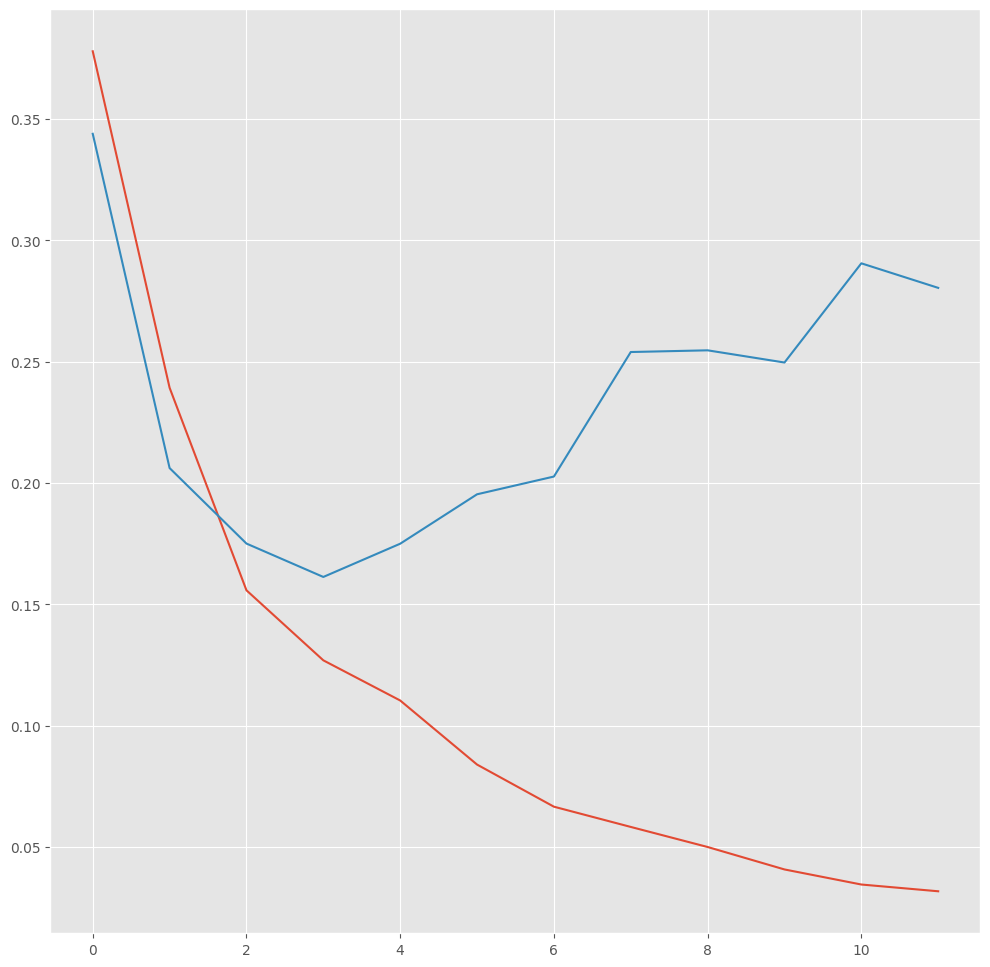

In [ ]:
history = model.fit([X_train, X_mask], np.array(y_train), batch_size=64, epochs=12,
                    validation_split=0.1, sample_weight=sample_weight, verbose=1)
hist = pd.DataFrame(history.history)
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(12,12))
plt.plot(hist["loss"])
plt.plot(hist["val_loss"])
plt.show()

### LSTM UN BILSTM PĀRBAUDĪŠANA

In [ ]:
# OpenAI. GPT-4o. Uzvedne: kā izmainīt koda daļu, kur notiek modeļa pārbaude, tā, lai tiktu arī izmantotas maskas? https://chatgpt.com/ [izmantots 2025-04-15]
data = data_test
getter = SentenceGetter(data)
sentences = getter.sentences # get all sentences

# Word2inx & Padding for X
X = [[word2idx.get(w[0], 0) for w in s] for s in sentences]
X_test = pad_sequences(maxlen=max_len, sequences=X, padding="post", value=0)
X_test = np.array(X_test)
# Word2inx & Padding for y
y = [[tag2idx[w[1]] for w in s] for s in sentences]
y = pad_sequences(maxlen=max_len, sequences=y, padding="post", value=tag2idx['<pad>'])

# Get one-hot labels
y_test = [to_categorical(i, num_classes=n_tags) for i in y]

mask = data.groupby("Sentence #")["AspectMask"].apply(list).values
X_mask_test = pad_sequences(maxlen=max_len, sequences=mask, padding="post", value=0)
X_mask_test = np.array(X_mask_test)

<ipython-input-120-3b146fa73652>:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  self.grouped = self.data.groupby("Sentence #").apply(agg_func)


In [ ]:
print(sentences[1])
print(X_test[1])
print(np.argmax(y_test[1], -1))

[('ļoti', 'O'), ('draudzīgs', 'O'), ('cena', 'O'), ('ēdiens', 'POS'), ('un', 'O'), ('labs', 'O'), ('vietējs', 'O'), ('alus', 'POS'), ('izlase', 'POS'), ('.', 'O')]
[1061  413  960 2900 1099 1006 1093 2426 1524 1723    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
[4 4 4 3 4 4 4 3 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0]


In [ ]:
# Predictions.
idx2word = {value: key for key, value in word2idx.items()}
idx2tag = {value: key for key, value in tag2idx.items()}
print(idx2tag)

{1: 'NEU', 2: 'NEG', 3: 'POS', 4: 'O', 0: '<pad>'}


In [ ]:
true_all = np.argmax(y_test, -1)
true_all_tags = [[idx2tag[idx] for idx in s if idx!=0] for s in true_all]

p_all = model.predict([X_test, X_mask_test]) # (4796, 75, 18)
p_all= np.argmax(p_all, axis=-1) # (4796, 75)
p_all_tags = [[idx2tag[idx] for idx in s] for s in p_all] # ['B-gpe', 'O', 'O', 'O']

for i, true in enumerate(true_all_tags):
    length = len(true)
    p_all_tags[i] = p_all_tags[i][:length]

p_all_tags = [[x.replace('<pad>', 'O') for x in s] for s in p_all_tags]

print(sentences[3])
print(X_test[3])
print(true_all_tags[3])
print(p_all_tags[3])

21/21 ━━━━━━━━━━━━━━━━━━━━ 10s 479ms/step
[('perfekts', 'O'), ('apkalpošana', 'POS'), (',', 'O'), ('prast', 'O'), ('ieteikt', 'O'), ('lielisks', 'O'), ('ēdiens', 'O'), ('.', 'O')]
[1434 1737 1156    0  855 2285 2900 1723    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0]
['O', 'POS', 'O', 'O', 'O', 'O', 'O', 'O']
['O', 'POS', 'O', 'O', 'O', 'O', 'O', 'O']


In [ ]:
# OpenAI. ChatGPT o3-mini-high. Uzvedne: kā man izlabot kļūdu ValueError: max() arg is an empty sequence šajā koda daļā? https://chatgpt.com/ [izmantots 2025-03-26]
# OpenAI. ChatGPT o3-mini-high. Uzvedne: šo kodu es izmantoju modeļa apmācīšanai ar datu kopu, kas ir paredzēta noskaņojumu noteikšanai aspektiem.
# CSV faili sastāv no teikuma numura, vārda un marķiera, kas apzīmē šī vārda noskaņojumu (2 - pozitīvs, 1 - neitrāls, 0 - negatīvs, O - nav noskaņojuma) https://chatgpt.com/ [izmantots 2025-03-26]
from sklearn.metrics import classification_report

true_flat = []
pred_flat = []
for i in range(len(true_all_tags)):
    true_flat.extend(true_all_tags[i])
    pred_flat.extend(p_all_tags[i])

print(classification_report(true_flat, pred_flat, labels=["NEG","NEU","POS","O"]))


              precision    recall  f1-score   support

         NEG       0.47      0.38      0.42       188
         NEU       0.14      0.02      0.03        55
         POS       0.69      0.84      0.76       397
           O       1.00      1.00      1.00      6602

    accuracy                           0.97      7242
   macro avg       0.58      0.56      0.55      7242
weighted avg       0.96      0.97      0.96      7242

